## <font color="maroon"><h4 align="center">Handling Missing Data - replace method</font>

In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv("weather_data_missing_data.csv")
df

,day,temperature,windspeed,event
0,01-01-2017,32,6,Rain
1,01-02-2017,-99999,7,Sunny
2,01-03-2017,28,-99999,Snow
3,01-04-2017,-99999,7,0
4,01-05-2017,32,-99999,Rain
5,01-06-2017,31,2,Sunny
6,01-06-2017,34,5,0
7,01-06-2017,34 F,5,0
8,01-06-2017,34 C,20mph,0
9,01-06-2017,34,20mph,0


**Replacing single value**

In [2]:
new_df = df.replace("-99999", value=np.NaN)
new_df
#to find nan values in any column
#new_df[new_df.isna().any(axis=1)]
 #to find all rows with nan values in particular column
#new_df[new_df['temperature'].isna()] 

,day,temperature,windspeed,event
0,01-01-2017,32,6,Rain
1,01-02-2017,NaN,7,Sunny
2,01-03-2017,28,NaN,Snow
3,01-04-2017,NaN,7,0
4,01-05-2017,32,NaN,Rain
5,01-06-2017,31,2,Sunny
6,01-06-2017,34,5,0
7,01-06-2017,34 F,5,0
8,01-06-2017,34 C,20mph,0
9,01-06-2017,34,20mph,0


**Replacing list with single value**

In [3]:
new_df = df.replace(to_replace=["-99999","-88888"], value=np.NaN)
new_df

,day,temperature,windspeed,event
0,01-01-2017,32,6,Rain
1,01-02-2017,NaN,7,Sunny
2,01-03-2017,28,NaN,Snow
3,01-04-2017,NaN,7,0
4,01-05-2017,32,NaN,Rain
5,01-06-2017,31,2,Sunny
6,01-06-2017,34,5,0
7,01-06-2017,34 F,5,0
8,01-06-2017,34 C,20mph,0
9,01-06-2017,34,20mph,0


**Replacing per column**

In [4]:
#print(df.info())
new_df = df.replace({
        'temperature': "-99999",
        'windspeed': "-99999",
        'event': '0'
    }, np.nan)
new_df



,day,temperature,windspeed,event
0,01-01-2017,32,6,Rain
1,01-02-2017,NaN,7,Sunny
2,01-03-2017,28,NaN,Snow
3,01-04-2017,NaN,7,NaN
4,01-05-2017,32,NaN,Rain
5,01-06-2017,31,2,Sunny
6,01-06-2017,34,5,NaN
7,01-06-2017,34 F,5,NaN
8,01-06-2017,34 C,20mph,NaN
9,01-06-2017,34,20mph,NaN


**Replacing by using mapping**

In [9]:
new_df = df.replace({
        '-99999': np.nan,
        '0':'sunny'
    })
new_df

,day,temperature,windspeed,event
0,01-01-2017,32,6,Rain
1,01-02-2017,NaN,7,Sunny
2,01-03-2017,28,NaN,Snow
3,01-04-2017,NaN,7,sunny
4,01-05-2017,32,NaN,Rain
5,01-06-2017,31,2,Sunny
6,01-06-2017,34,5,sunny
7,01-06-2017,34 F,5,sunny
8,01-06-2017,34 C,20mph,sunny
9,01-06-2017,34,20mph,sunny


**Regex**

In [4]:
# when windspeed is 6 mph, 7 mph etc. & temperature is 32 F, 28 F etc.
new_df = df.replace({'temperature': '[A-Za-z]', 'windspeed': '[A-Za-z]'},'',
                                                                    regex=True) 
new_df      

,day,temperature,windspeed,event
0,01-01-2017,32,6,Rain
1,01-02-2017,-99999,7,Sunny
2,01-03-2017,28,-99999,Snow
3,01-04-2017,-99999,7,0
4,01-05-2017,32,-99999,Rain
5,01-06-2017,31,2,Sunny
6,01-06-2017,34,5,0
7,01-06-2017,34,5,0
8,01-06-2017,34,20,0
9,01-06-2017,34,20,0


**Replacing list with another list**

In [5]:
df = pd.DataFrame({
    'score': ['exceptional','average', 'good', 'poor', 'average', 'exceptional'],
    'student': ['rob', 'maya', 'parthiv', 'tom', 'julian', 'erica']
})
df

,score,student
0,exceptional,rob
1,average,maya
2,good,parthiv
3,poor,tom
4,average,julian
5,exceptional,erica


In [6]:
new_df=df.replace(['poor', 'average', 'good', 'exceptional'], [1,2,3,4])
print(new_df)

   score  student
0      4      rob
1      2     maya
2      3  parthiv
3      1      tom
4      2   julian
5      4    erica


In [7]:
print(df['score'].unique())
print(df['score'].nunique())

['exceptional' 'average' 'good' 'poor']
4


['exceptional' 'average' 'good' 'poor']
4
exceptional    2
average        2
poor           1
good           1
Name: score, dtype: int64
   score  student
0      4      rob
1      2     maya
2      3  parthiv
3      1      tom
4      2   julian
5      4    erica


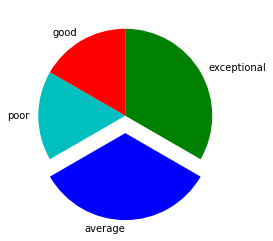

In [14]:

print(df['score'].value_counts())
df1=df['score'].value_counts()

import matplotlib.pyplot as plt
plt.pie(df1.values,labels=df1.index,colors=['g','b','c','r'],explode=(0,0.2,0,0),counterclock=False,startangle=90)
plt.show()        

In [ ]:
# to calculate average
new_df.mean()
new_df["score"].mean()
#to find total number of rows
#new_df.shape
#new_df.count()
#new_df.info()
len(new_df.index)

In [12]:
#aad new column in the data frame
new_df["email"]=df["student"]+"@mycompany.com"
new_df

,score,student,email
0,4,rob,rob@mycompany.com
1,2,maya,maya@mycompany.com
2,3,parthiv,parthiv@mycompany.com
3,1,tom,tom@mycompany.com
4,2,julian,julian@mycompany.com
5,4,erica,erica@mycompany.com


In [7]:
#display only students with score >2
new_df[new_df["score"]>2]

,score,student
0,4,rob
2,3,parthiv
5,4,erica


In [9]:
new_df[(new_df["score"]>2) & (df['student']=='parthiv')]

,score,student
2,3,parthiv


In [18]:
#how many distinct values are there in the frame new_df score column
print(df["score"].value_counts())

#new_df["score"].unique()
df[['score']].nunique()   #will show how many different values are there


average        2
exceptional    2
poor           1
good           1
Name: score, dtype: int64


score    4
dtype: int64